# MCF Rab5a Example
Ziyad Rahman

Updated for 9-6 meeting with Mitchel. There's a CLI for this, but this is an example of the program as code.

## Importing and Setup

In [ ]:
import src.tiffstack as ts
import src.tiffvisualize as tv

from src.flow import preprocess_stack

f_path = 'example_images/20220929_MCF_Rab5a_WH_heterotypic_s1_SCALED.tif' # just the path to the Tiff, it's about 0.68GB

Let's import the tiffstack to the program.

In [2]:
img = ts.TiffStack(f_path, 'Rab5a')  # create a TiffStack object
arr = img.arr
arr.shape

(96, 3, 520, 2329)

We're going to confirm the channels are correct.

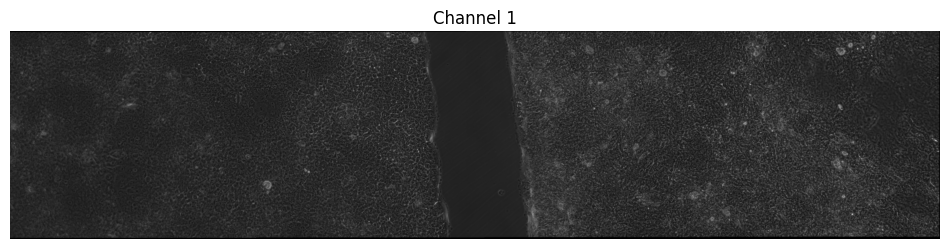

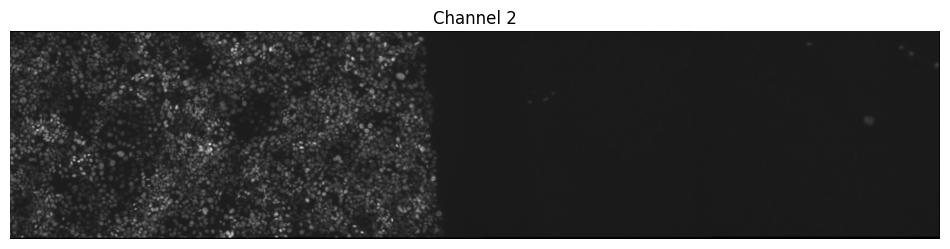

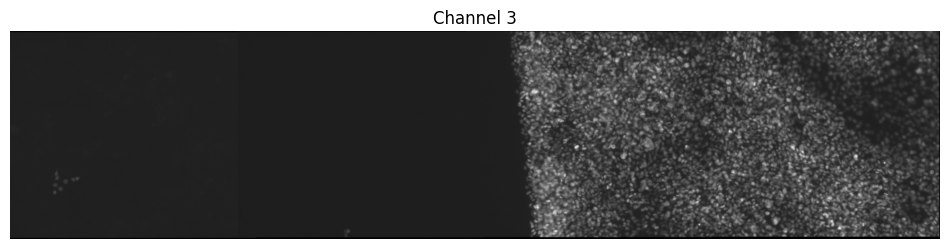

In [3]:
f1c1 = img.isolate_channel(0)[0] # isolate the first frame of channel 1; Python indexing starts at 0, so channel 1 is index 0
f1c2 = img.isolate_channel(1)[0] # isolate the first frame of channel 2
f1c3 = img.isolate_channel(2)[0] # isolate the first frame of channel 3

tv.show_image(f1c1, title='Channel 1')
tv.show_image(f1c2, title='Channel 2')
tv.show_image(f1c3, title='Channel 3')

## Preprocessing and Optical Flow

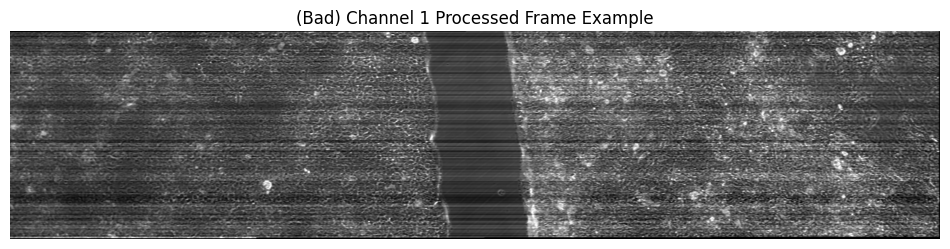

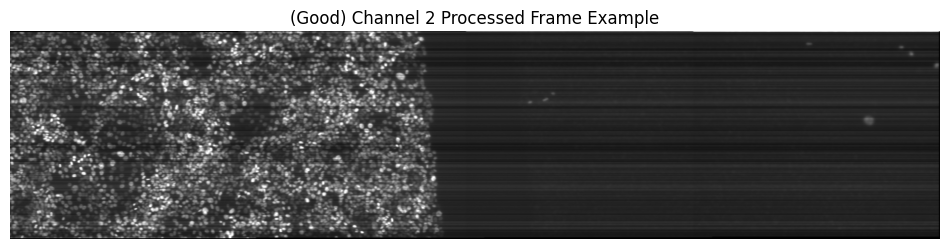

In [4]:
processed_c1_example = preprocess_stack(f1c1)
processed_c2_example = preprocess_stack(f1c2)

tv.show_image(processed_c1_example, title='(Bad) Channel 1 Processed Frame Example')
tv.show_image(processed_c2_example, title='(Good) Channel 2 Processed Frame Example')

In [5]:
flow = img.calculate_optical_flow()
flow.shape

(95, 3, 520, 2329, 2)

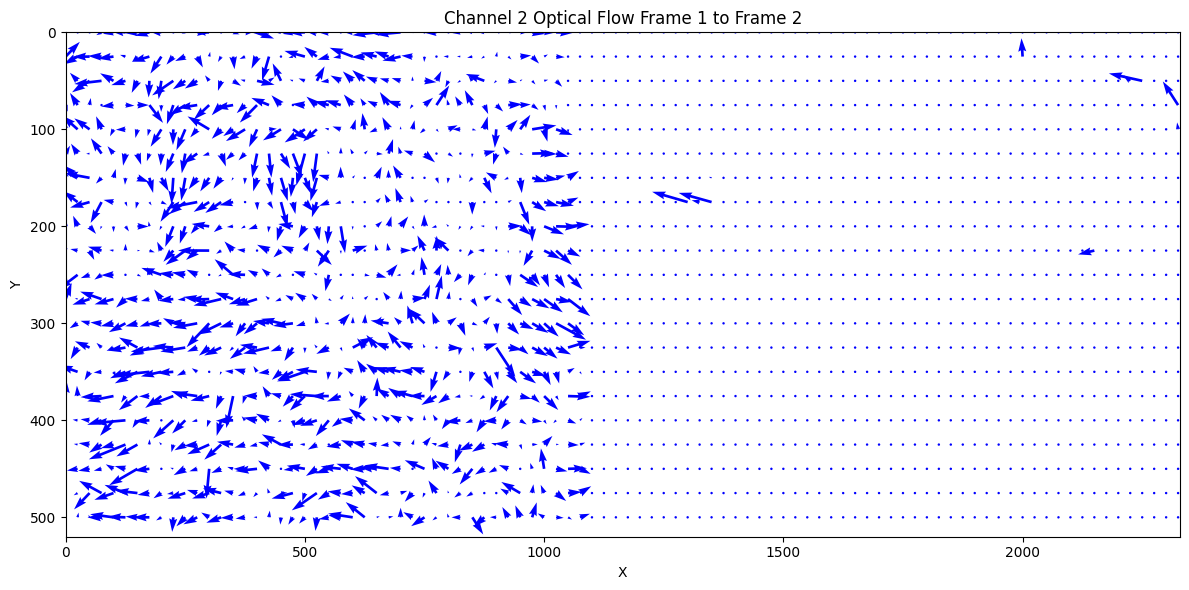

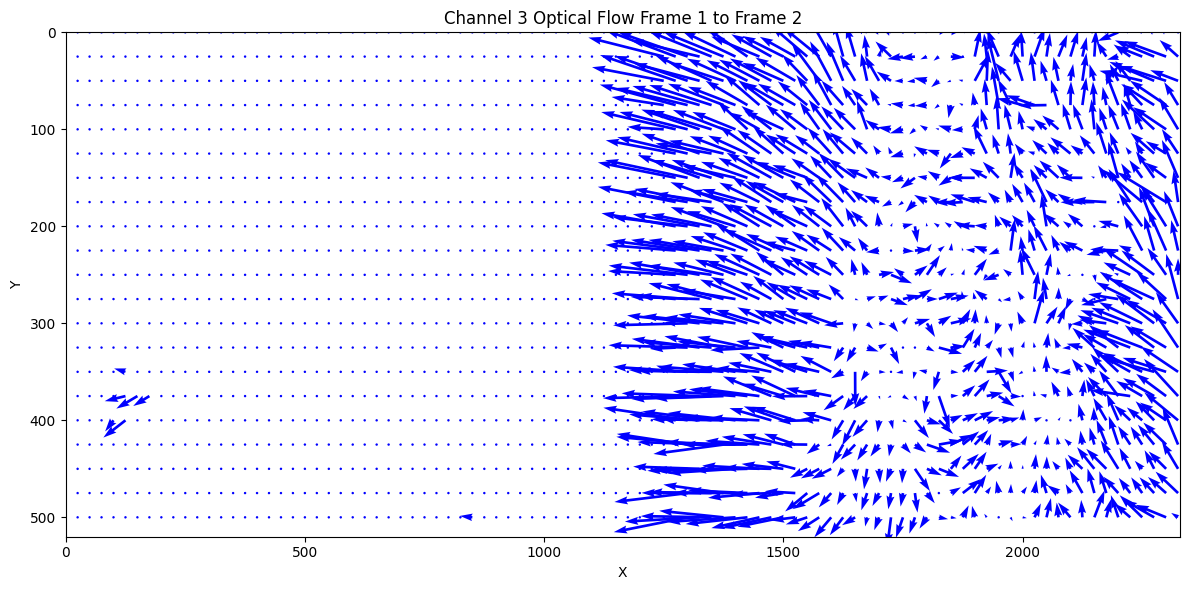

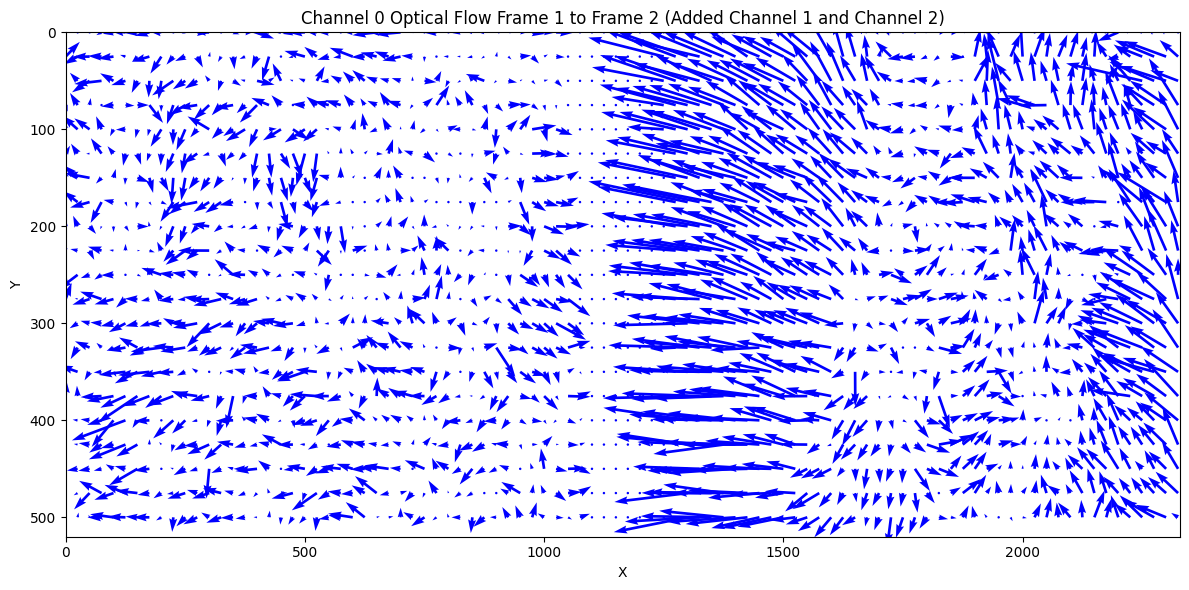

In [6]:
c1_flow = flow[:, 1, :, :]  # Channel 2 optical flow (indexing starts at 0, so channel 2 is index 1)
c2_flow = flow[:, 2, :, :]  # Channel 3 optical flow (the : means all, so we're taking all frames and all pixes in channel 1)
c0_flow = flow[:, 0, :, :]  # Channel 1 + Channel 2 optical flow

tv.show_flow(c1_flow[0], title='Channel 2 Optical Flow Frame 1 to Frame 2')
tv.show_flow(c2_flow[0], title='Channel 3 Optical Flow Frame 1 to Frame 2')
tv.show_flow(c0_flow[0], title='Channel 0 Optical Flow Frame 1 to Frame 2 (Added Channel 1 and Channel 2)')

In [7]:
img.save_optflow_video(flow) # v0
img.save_optflow_video(flow, 1) # v1
img.save_optflow_video(flow, 2) # v2

# saving with overlay
img.save_optflow_video(flow, 0, overlay=True) #v3
img.save_optflow_video(flow, 1, overlay=True) #v4

For time reference (the overlay takes longer, so this is the upper bound on time).

In [8]:
img.save_optflow_video(flow, 0, overlay=True) #v5